This notebook performs the Convolutional Neural Network for 'clean' data.

Parameters:

4,8,32 mfcc coefficients

2048 samples per window width

512 samples per overlap

In [1]:
#Helper Function
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pylab as plt

#save all previous epochs for use in plotting learning curve
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

Using TensorFlow backend.


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#deep learning libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
import sklearn
from sklearn import metrics

### this is where the magic happens

### 4 MFCCs

In [3]:
#load the variables
x_train=np.load('base4_x_train.npy')
x_test=np.load('base4_x_test.npy')
y_trainHot=np.load('base4_y_train.npy')
y_testHot=np.load('base4_y_test.npy')
class_weight=np.load('weights.npy')

In [4]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=251
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15))  
   
    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [5]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [6]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 4, 32)          18784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 4, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [7]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 18264 samples, validate on 5708 samples
Epoch 1/5
18264/18264 [==============================] - 6s 328us/step - loss: 4.6918 - acc: 0.0534 - val_loss: 3.7891 - val_acc: 0.1352
Epoch 2/5
18264/18264 [==============================] - 5s 292us/step - loss: 3.6363 - acc: 0.1458 - val_loss: 3.1854 - val_acc: 0.2309
Epoch 3/5
18264/18264 [==============================] - 5s 297us/step - loss: 3.1464 - acc: 0.2227 - val_loss: 2.7431 - val_acc: 0.3096
Epoch 4/5
18264/18264 [==============================] - 6s 327us/step - loss: 2.8132 - acc: 0.2827 - val_loss: 2.4824 - val_acc: 0.3607
Epoch 5/5
18264/18264 [==============================] - 6s 331us/step - loss: 2.6160 - acc: 0.3167 - val_loss: 2.3535 - val_acc: 0.4057


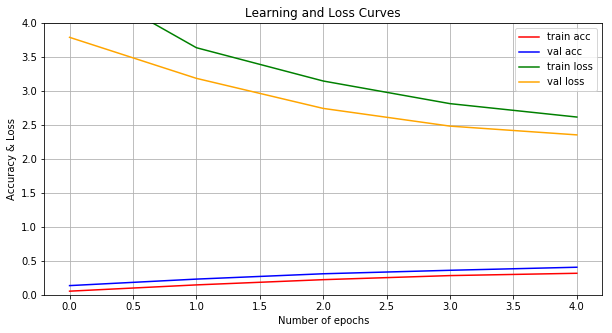

In [8]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,4))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [10]:
#load the validation data
x_val=np.load('base4_x_val.npy')
y_valHot=np.load('base4_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

4567/4567 [==============================] - 0s 80us/step


[2.3264379105109576, 0.40354718625845676]

### 8 MFCCs

In [11]:
#load the variables
x_train=np.load('base8_x_train.npy')
x_test=np.load('base8_x_test.npy')
y_trainHot=np.load('base8_y_train.npy')
y_testHot=np.load('base8_y_test.npy')
class_weight=np.load('weights.npy')

In [12]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=251
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15)) 
    
    model.add(Conv2D(filters=64, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15))
    
   
    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [13]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [14]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 8, 32)          18784     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 8, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 8, 32)          128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 8, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 8, 64)          256       
__________

In [15]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history2=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 18264 samples, validate on 5708 samples
Epoch 1/5
18264/18264 [==============================] - 11s 596us/step - loss: 4.0395 - acc: 0.1477 - val_loss: 2.2480 - val_acc: 0.4340
Epoch 2/5
18264/18264 [==============================] - 10s 539us/step - loss: 2.1314 - acc: 0.4249 - val_loss: 1.4728 - val_acc: 0.5911
Epoch 3/5
18264/18264 [==============================] - 10s 534us/step - loss: 1.6823 - acc: 0.5249 - val_loss: 1.1673 - val_acc: 0.6647
Epoch 4/5
18264/18264 [==============================] - 9s 520us/step - loss: 1.3943 - acc: 0.5946 - val_loss: 0.9329 - val_acc: 0.7384
Epoch 5/5
18264/18264 [==============================] - 10s 556us/step - loss: 1.1936 - acc: 0.6482 - val_loss: 0.7985 - val_acc: 0.7730


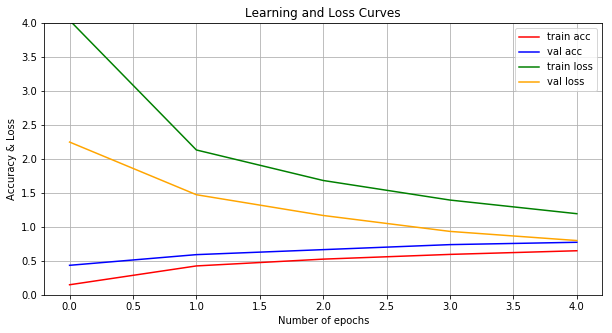

In [16]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history2.history['acc'], color='red')
plt.plot(history2.history['val_acc'], color='blue')
plt.plot(history2.history['loss'], color='green')
plt.plot(history2.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,4))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [17]:
#load the validation data
x_val=np.load('base8_x_val.npy')
y_valHot=np.load('base8_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

4567/4567 [==============================] - 1s 111us/step


[0.7818515551855039, 0.7827895773639558]

### 32 MFCCs

In [18]:
#load the variables
x_train=np.load('base_x_train.npy')
x_test=np.load('base_x_test.npy')
y_trainHot=np.load('base_y_train.npy')
y_testHot=np.load('base_y_test.npy')
class_weight=np.load('weights.npy')

In [19]:
#deep learning model

#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
def runCNNmodel(a,b,c,d):
    #batch=32
    #epochs=50
    num_labels=251
    one, two, three = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    input_shape = (one, two, three)
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15)) 
    
    #output nodes
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #hidden layers
    model.add(Dropout(0.15))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [20]:
#run the model
model=runCNNmodel(x_train,y_trainHot,x_test,y_testHot)

In [21]:
#generate the breakdown of trainable parameters each step in the process
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 32, 32)         18784     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 32, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 32, 32)         128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 32, 32)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
__________

In [22]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train the model
history3=model.fit(x_train,y_trainHot,batch_size=32,epochs=5,validation_data=(x_test,y_testHot),callbacks=[MetricsCheckpoint('logs4D')], class_weight=class_weight)

Train on 18264 samples, validate on 5708 samples
Epoch 1/5
18264/18264 [==============================] - 11s 581us/step - loss: 2.9576 - acc: 0.3788 - val_loss: 0.5101 - val_acc: 0.8961
Epoch 2/5
18264/18264 [==============================] - 11s 576us/step - loss: 0.4376 - acc: 0.8782 - val_loss: 0.1670 - val_acc: 0.9588
Epoch 3/5
18264/18264 [==============================] - 11s 606us/step - loss: 0.2216 - acc: 0.9346 - val_loss: 0.1107 - val_acc: 0.9707
Epoch 4/5
18264/18264 [==============================] - 11s 578us/step - loss: 0.1540 - acc: 0.9519 - val_loss: 0.0955 - val_acc: 0.9763
Epoch 5/5
18264/18264 [==============================] - 10s 559us/step - loss: 0.1185 - acc: 0.9637 - val_loss: 0.0694 - val_acc: 0.9825


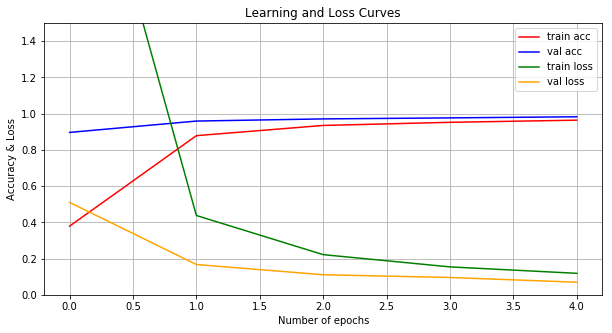

In [27]:
#plot the learning and loss curves together
plt.figure(figsize=(10,5))
plt.plot(history3.history['acc'], color='red')
plt.plot(history3.history['val_acc'], color='blue')
plt.plot(history3.history['loss'], color='green')
plt.plot(history3.history['val_loss'], color='orange')
plt.title('Learning and Loss Curves')
plt.ylim((0,1.5))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train acc','val acc','train loss','val loss'], loc='upper right')
plt.grid()
plt.show()

In [24]:
#load the validation data
x_val=np.load('base_x_val.npy')
y_valHot=np.load('base_y_val.npy')
#evaluate on outside data
model.evaluate(x=x_val, y=y_valHot, batch_size=32)

4567/4567 [==============================] - 1s 185us/step


[0.07095397055925623, 0.9809502956510661]

### compare val accuracy by # of MFCCs

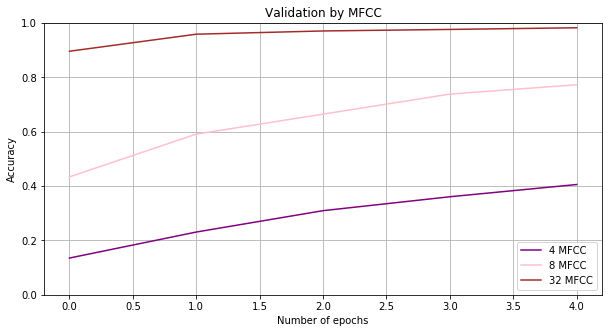

In [25]:
#4 MFCC vs 8 MFCC vs 32 MFCC by validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['val_acc'], color='purple')
plt.plot(history2.history['val_acc'], color='pink')
plt.plot(history3.history['val_acc'], color='brown')
plt.title('Validation by MFCC')
plt.ylim((0,1))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['4 MFCC','8 MFCC','32 MFCC'], loc='lower right')
plt.grid()
plt.show()